In [1]:
# Scikit-Learn ≥0.20 is required
import sklearn
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
def load_stroke_data():
    csv_path = os.path.join("datasets", "healthcare-dataset-stroke-data.csv")
    # more info about the data: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset/metadata
    return pd.read_csv(csv_path)

more info about the data: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset/metadata

In [3]:
stroke = load_stroke_data()

In [4]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


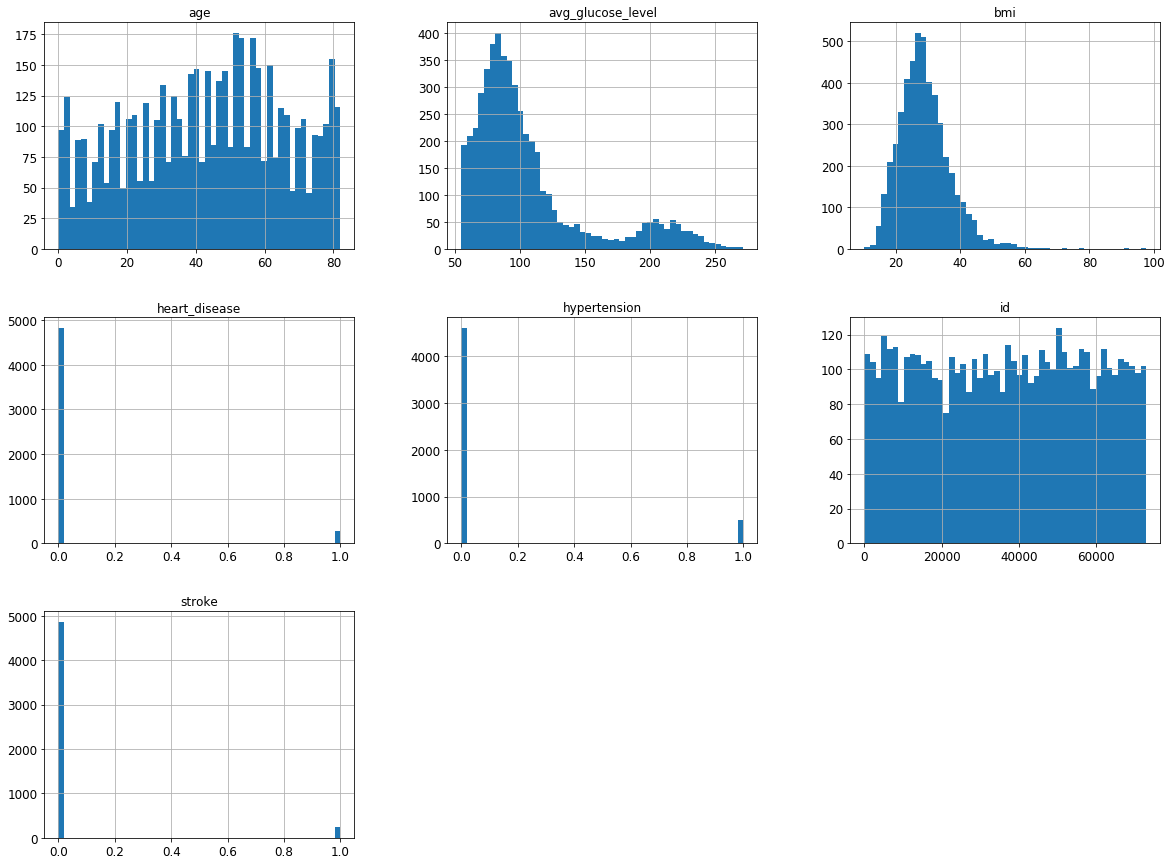

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
stroke.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

In [8]:
corr_matrix = stroke.corr()

In [9]:
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
Name: stroke, dtype: float64

NameError: name 'save_fig' is not defined

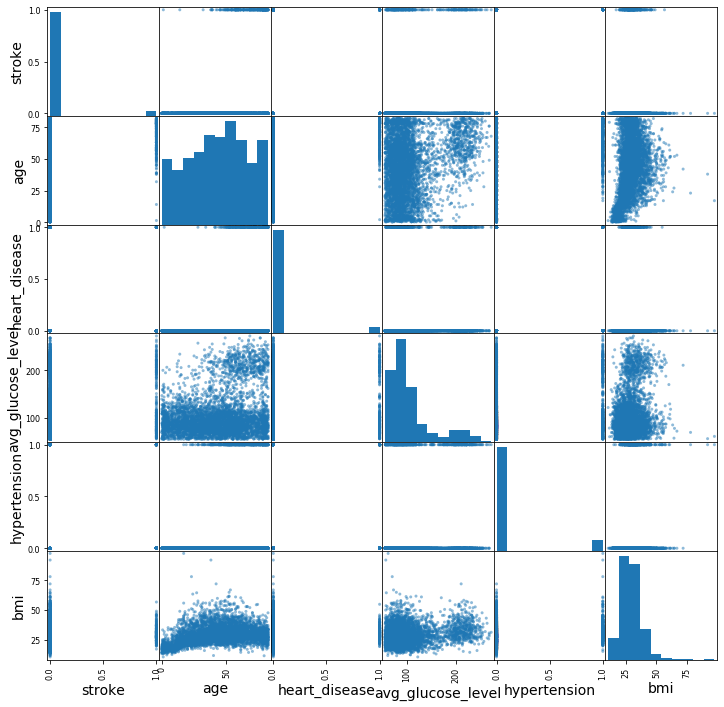

In [11]:
from pandas.plotting import scatter_matrix

attributes = ["stroke", "age", "heart_disease",
              "avg_glucose_level","hypertension","bmi" ]
scatter_matrix(stroke[attributes], figsize=(12, 12))
#save_fig("scatter_matrix_plot")

# Split into training and test 

In [12]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(stroke,test_size=0.20,random_state=42)
len(train_set), len(test_set)

(4088, 1022)

This dataset has an unique ID as first row (id) so no need to generate unique identifiers.

In [13]:
X = train_set.drop("stroke", axis=1) # drop labels (Y) for training set
Y = train_set["stroke"].copy() # labels (Ax=y, y is label) for stratified stroke data

# Prepare the data for ML algorithm

In [14]:
stroke_gender = X[["gender"]]
stroke_ever_married = X[["ever_married"]]
stroke_work_type = X[["work_type"]]
stroke_Residence_type = X[["Residence_type"]]
stroke_smoking_status = X[["smoking_status"]]

In [16]:
from sklearn.preprocessing import OrdinalEncoder
# OneHotEncoder
gender_encoder = OrdinalEncoder(categories = [['Other', 'Male', 'Female']])
ever_married_encoder = OrdinalEncoder(categories = [['No','Yes']])
work_type_encoder = OrdinalEncoder(categories = [['Never_worked','children','Govt_job','Private','Self-employed']])
Residence_type_encoder = OrdinalEncoder(categories = [['Rural', 'Urban']])
smoking_status_encoder = OrdinalEncoder(categories = [['Unknown', 'never smoked','formerly smoked', 'smokes']])

X_gender_encoded = gender_encoder.fit_transform(stroke_gender)
X_ever_married_encoded = ever_married_encoder.fit_transform(stroke_ever_married)
X_work_type_encoded = work_type_encoder.fit_transform(stroke_work_type)
X_Residence_type_encoded = Residence_type_encoder.fit_transform(stroke_Residence_type)
X_smoking_status_encoded = smoking_status_encoder.fit_transform(stroke_smoking_status)

In [21]:
X_gender_encoded.shape

(4088, 1)

In [24]:
X_num = X.drop(["id","gender","hypertension","heart_disease","ever_married",
             "work_type","Residence_type","smoking_status"],axis=1)

In [25]:
X_num

,age,avg_glucose_level,bmi
802,79.00,112.64,28.5
3927,62.00,88.32,36.3
2337,21.00,59.52,33.7
3910,31.00,65.70,30.4
1886,31.00,59.63,19.9
...,...,...,...
4426,43.00,88.00,30.6
466,61.00,170.05,60.2
3092,1.16,97.28,17.8
3772,80.00,196.08,31.0


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
#('std_scaler', StandardScaler()),
])

In [27]:
X_num_tr = num_pipeline.fit_transform(X_num)

In [28]:
X_num

,age,avg_glucose_level,bmi
802,79.00,112.64,28.5
3927,62.00,88.32,36.3
2337,21.00,59.52,33.7
3910,31.00,65.70,30.4
1886,31.00,59.63,19.9
...,...,...,...
4426,43.00,88.00,30.6
466,61.00,170.05,60.2
3092,1.16,97.28,17.8
3772,80.00,196.08,31.0


In [30]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat1", gender_encoder, ["gender"]),
        ("cat2", ever_married_encoder, ["ever_married"]),
        ("cat3", work_type_encoder, ["work_type"]),
        ("cat4", Residence_type_encoder, ["Residence_type"]),
        ("cat5", smoking_status_encoder, ["smoking_status"]),
    ])

X_prepared = full_pipeline.fit_transform(X)
X_names = ["age","avg_glucose_level","bmi","gender","ever_married",
                 "work_type","Residence_type","smoking_status"]

# select and train a model

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

In [34]:
X_prepared, X_prepared.shape, Y.shape

(array([[ 79.  , 112.64,  28.5 , ...,   4.  ,   0.  ,   2.  ],
        [ 62.  ,  88.32,  36.3 , ...,   3.  ,   1.  ,   0.  ],
        [ 21.  ,  59.52,  33.7 , ...,   3.  ,   0.  ,   1.  ],
        ...,
        [  1.16,  97.28,  17.8 , ...,   1.  ,   1.  ,   0.  ],
        [ 80.  , 196.08,  31.  , ...,   4.  ,   0.  ,   2.  ],
        [ 46.  , 100.15,  50.3 , ...,   3.  ,   0.  ,   3.  ]]),
 (4088, 8),
 (4088,))

In [75]:
#del tree_class
tree_class = DecisionTreeClassifier(random_state=42,max_depth=3)
tree_class.fit(X_prepared, Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [76]:
X_predictions = tree_class.predict(X_prepared)
#tree_mse = mean_squared_error(Y, X_predictions)
#tree_rmse = np.sqrt(tree_mse)
#tree_rmse

In [100]:
tree_class.fit(Y,X_predictions)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [77]:
confusion_matrix(Y,X_predictions)

array([[3901,    0],
       [ 186,    1]])

In [78]:
export_graphviz(
            tree_class,
            out_file=os.path.join("iris_tree.dot"),
            feature_names=X_names,
            class_names="stroke",
            rounded=True,
            filled=True
        )

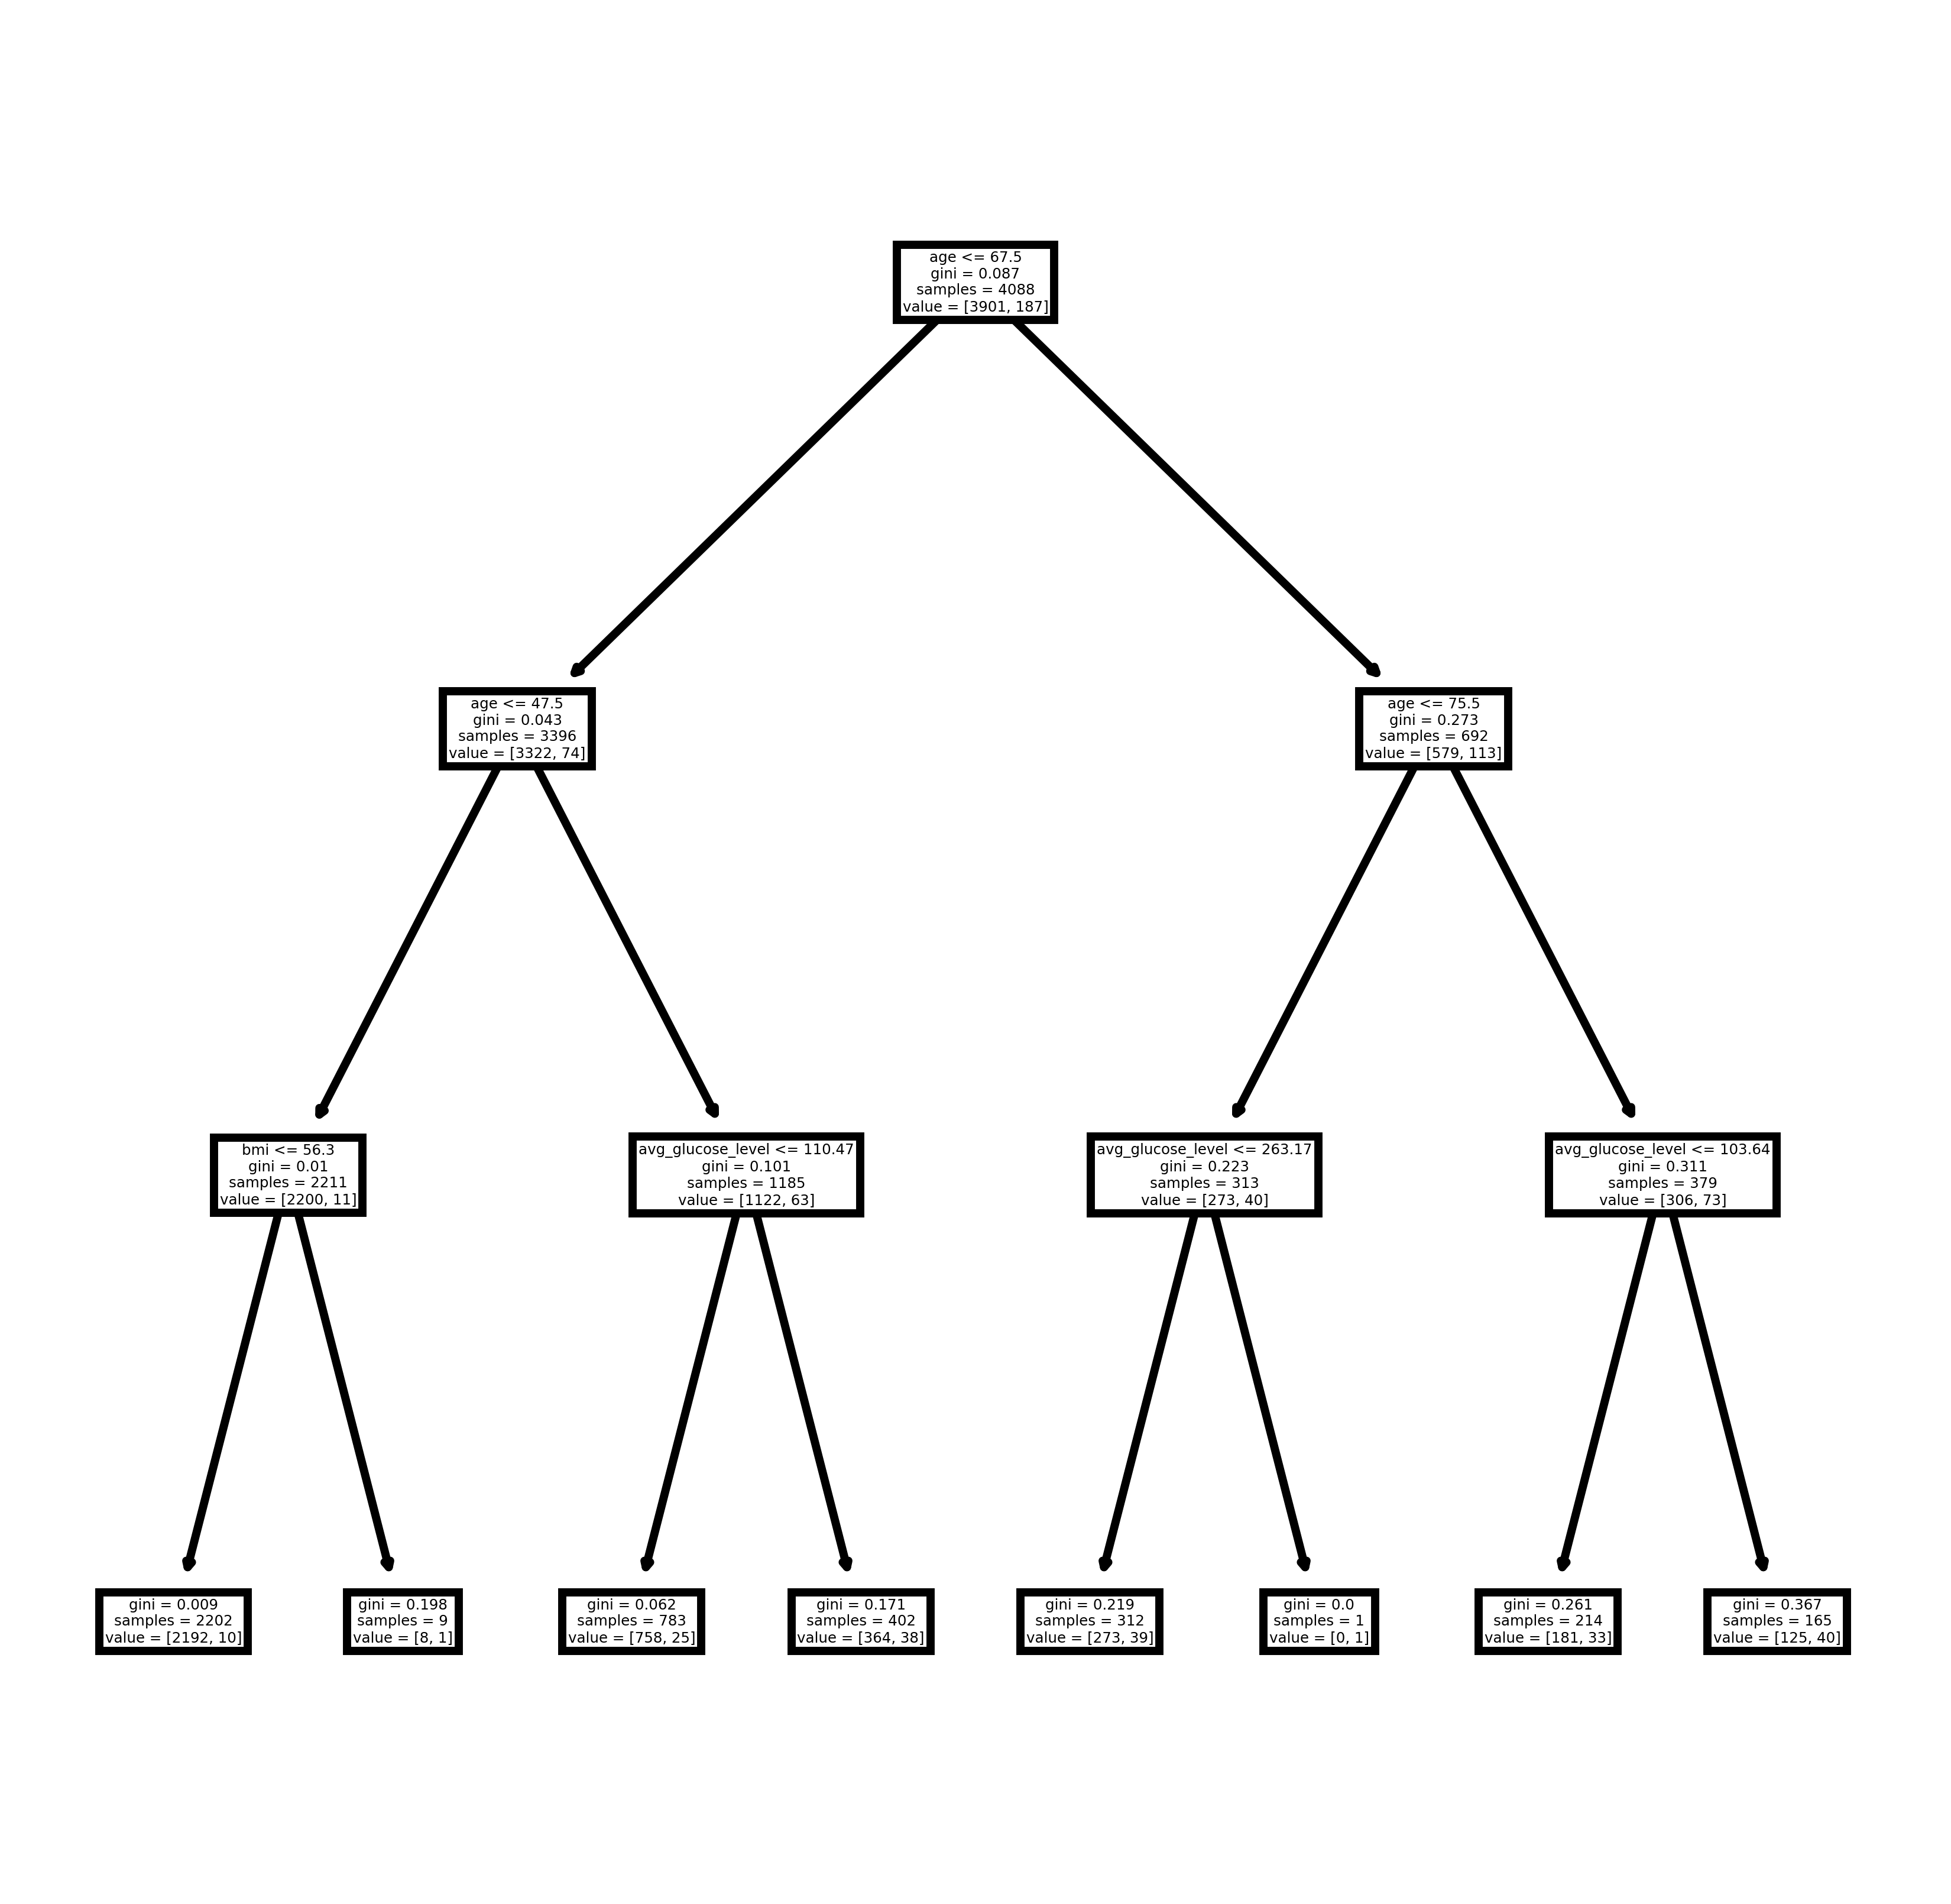

In [79]:
%matplotlib inline
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
sklearn.tree.plot_tree(tree_class,feature_names=X_names)
fig.savefig('imagename.png')

It appears that the decision tree model is overfit. All 197 stroke cases were correctly classified on the training dataset. 

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
#del Rtree_class
#RandomForestClassifier(n_estimators=145,criterion='gini')

Rtree_class = RandomForestClassifier(n_estimators=100,criterion='gini')# DecisionTreeClassifier(random_state=42,max_depth=3)
Rtree_class.fit(X_prepared, Y)

X_predictions = Rtree_class.predict(X_prepared)
confusion_matrix(Y,X_predictions)

array([[3901,    0],
       [   0,  187]])

In [104]:
Rtree_class.

array([0.26706834, 0.29619415, 0.24779639, 0.02994452, 0.01768911,
       0.04605925, 0.03059778, 0.06465046])

In [90]:
Rtree_class.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1179921109, splitter='best')

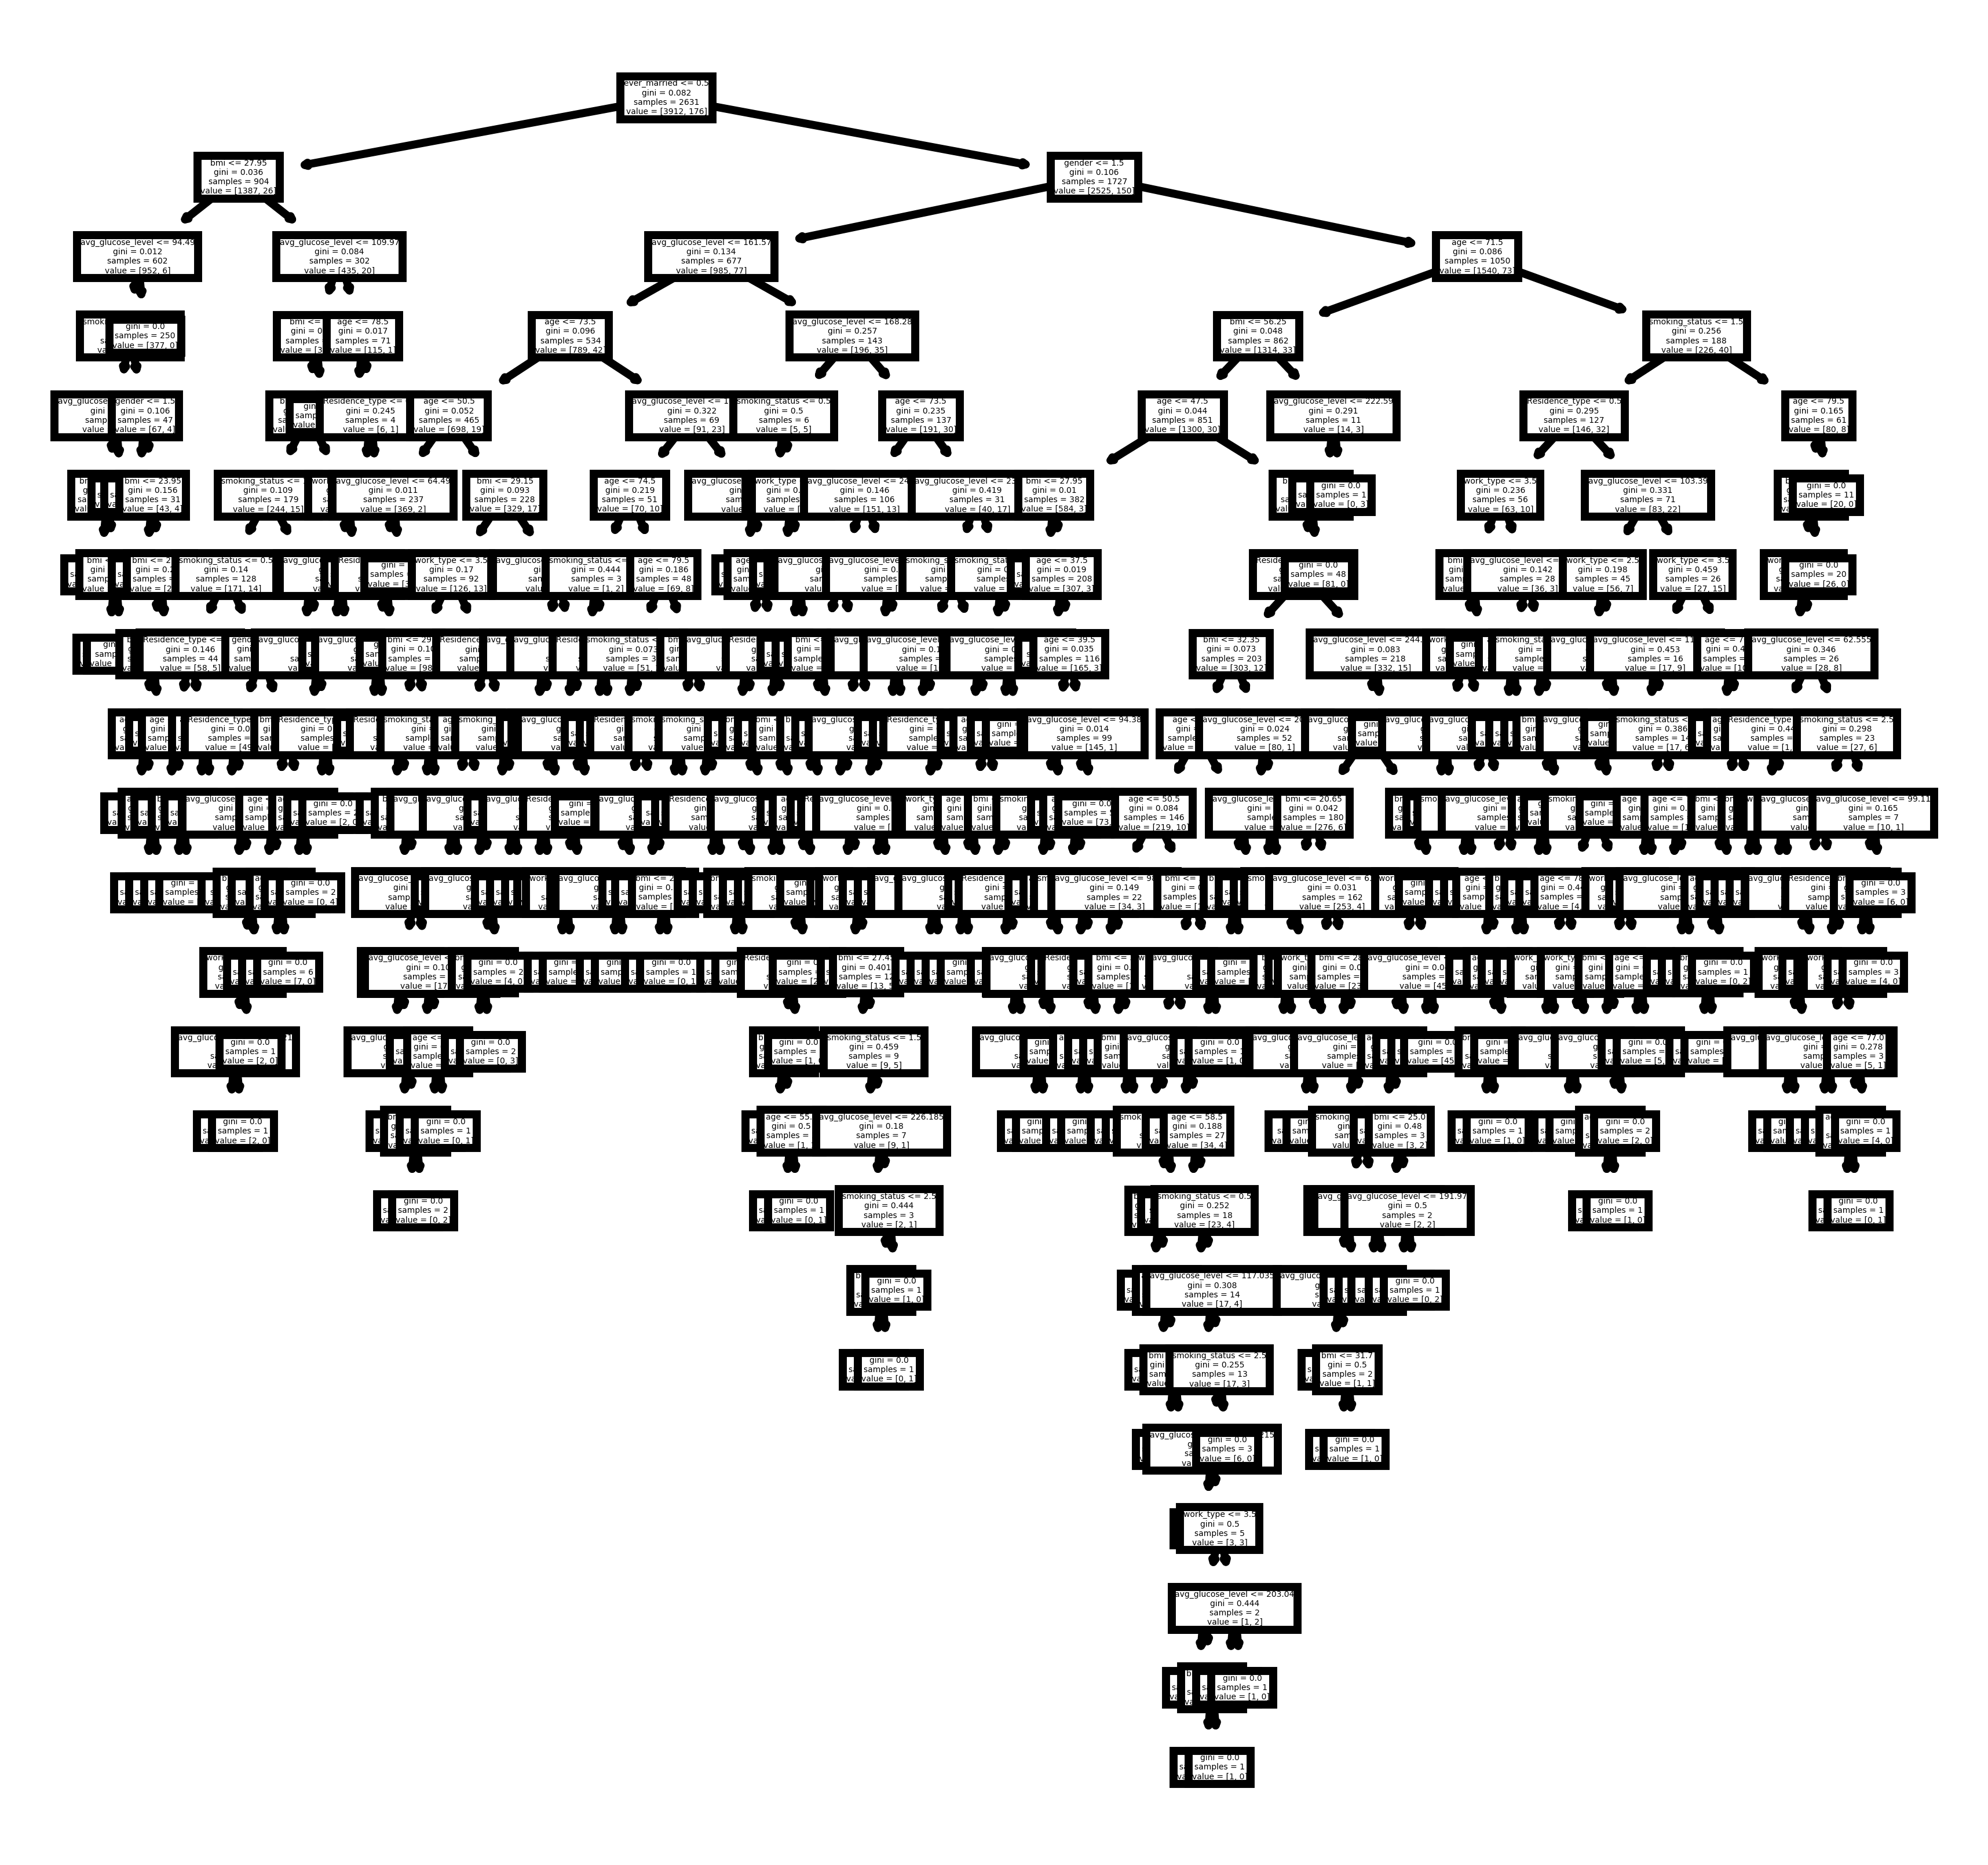

In [98]:
%matplotlib inline
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
sklearn.tree.plot_tree(Rtree_class.estimators_[1],feature_names=X_names)
fig.savefig('imagename.png')

# fine tune the model

In [354]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, stroke_prepared, stroke_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [355]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.320452   0.30879528 0.26627926 0.27530823 0.27971344 0.31661412
 0.32799308 0.31272913 0.29288959 0.28439823]
Mean: 0.29851723676365105
Standard deviation: 0.020365699557895963
